### Create MapBox tiles (mbtiles) 
Based on [this Sci-team notebook](https://github.com/Vizzuality/sci_team_data_bank/blob/master/Projects/usa-resilience-opportunity-map/processing/create_MBTiles.ipynb)

If not installed, install tippecanoe in terminal with: $brew install tippecanoe

python libraries

In [1]:
import pandas as pd 
import geopandas as gpd
import getpass
import requests
import shapely.wkb 
import subprocess

Utils

In [3]:
def create_mbtiles(source_path, dest_path, layer_name, opts="-zg --drop-densest-as-needed --extend-zooms-if-still-dropping --force --read-parallel"):
    """
    Use tippecanoe to create a MBTILE at dest_path from source_path.
    layer_name is used for the name of the layer in the MBTILE.
    Regex file path (/*.geojson) is supported for source_path.
    """
    cmd = f"tippecanoe -o {dest_path} -l {layer_name} {opts} {source_path}"
    print(f"Processing: {cmd}")
    r = subprocess.call(cmd, shell=True)
    if r == 0:
        print("Task created")
    else:
        print("Task failed")
    print("Finished processing")

## Read data

In [7]:
region = gpd.read_file('../data/ADM_TOURISM_REGIONS_SP.geojson')

In [10]:
region

,TOURISM_REGION_ID,TOURISM_REGION_NAME,OBJECTID,SE_ANNO_CAD_DATA,FEATURE_AREA_SQM,FEATURE_LENGTH_M,GEOMETRY.AREA,GEOMETRY.LEN,fme_feature_type,geometry
0,A,Vancouver Island,1,None,7.899137e+10,1.765822e+06,0,0,WHSE_LEGAL_ADMIN_BOUNDARIES.ADM_TOURISM_REGION...,"POLYGON ((-125.70224 51.97560, -125.70092 51.9..."
1,B,"Vancouver, Coast and Mountains",2,None,3.989027e+10,1.227848e+06,0,0,WHSE_LEGAL_ADMIN_BOUNDARIES.ADM_TOURISM_REGION...,"POLYGON ((-120.76717 49.20189, -120.76726 49.2..."
2,C,Thompson Okanagan,3,None,8.057539e+10,2.105602e+06,0,0,WHSE_LEGAL_ADMIN_BOUNDARIES.ADM_TOURISM_REGION...,"POLYGON ((-119.33300 53.29859, -119.33323 53.2..."
3,D,Kootenay Rockies,4,None,7.612180e+10,1.677104e+06,0,0,WHSE_LEGAL_ADMIN_BOUNDARIES.ADM_TOURISM_REGION...,"POLYGON ((-117.96679 52.46971, -117.98783 52.5..."
4,E,Cariboo Chilcotin Coast,5,None,1.350780e+11,2.654050e+06,0,0,WHSE_LEGAL_ADMIN_BOUNDARIES.ADM_TOURISM_REGION...,"POLYGON ((-120.34851 53.36976, -120.35498 53.3..."
5,F,Northern British Columbia,6,None,6.191277e+11,5.115348e+06,0,0,WHSE_LEGAL_ADMIN_BOUNDARIES.ADM_TOURISM_REGION...,"POLYGON ((-121.02102 53.42828, -121.00829 53.4..."


In [11]:
rename = {'Vancouver Island':'vancouver_island',
         'Vancouver, Coast and Mountains':'vancouver_coast_and_mountains',
         'Thompson Okanagan':'thompson_okanagan',
         'Kootenay Rockies':'kootenay_rockies',
         'Cariboo Chilcotin Coast':'cariboo_chilcotin_coast',
         'Northern British Columbia':'northern_british_columbia'}
region.replace({'TOURISM_REGION_NAME':rename}, inplace =True)

In [17]:
region.to_file('../data/ADM_TOURISM_REGIONS_SP_newname.geojson', driver="GeoJSON")

In [23]:
ski = gpd.read_file('../data/GSR_SKI_RESORTS_SV.geojson')
ski.head()

,FACILITY_NAME,KEYWORDS,STREET_ADDRESS,LOCALITY,MAILING_ADDRESS,WEBSITE_URL,IMAGE_URL,LATITUDE,LONGITUDE,PHYSICAL_ADDRESS,...,SITE_GEOCODED_IND,SOURCE_DATA_ID,CUSTODIAN_ORG_DESCRIPTION,BUSINESS_CATEGORY_CLASS,BUSINESS_CATEGORY_DESCRIPTION,OCCUPANT_TYPE_DESCRIPTION,SEQUENCE_ID,SE_ANNO_CAD_DATA,fme_feature_type,geometry
0,Wapiti Ski Club,recreation; ski; ski resort,1000 Natal Rd,Elkford,"1000 Natal Rd, Elkford, BC",None,None,50.021685,-114.938036,"1000 Natal Rd, Elkford, BC",...,None,59,"Ministry of Forest, Lands and Natural Resource...",skiingFacilities,Skiing Facilities,Skiing Facilities,59,None,WHSE_IMAGERY_AND_BASE_MAPS.GSR_SKI_RESORTS_SV,POINT (-114.93804 50.02169)
1,Summit Lake Ski Area,recreation; ski; ski resort,2815 Hwy 6,Nakusp,"2815 Hwy 6, Nakusp, BC",None,None,50.145464,-117.614379,"2815 Hwy 6, Nakusp, BC",...,None,57,"Ministry of Forest, Lands and Natural Resource...",skiingFacilities,Skiing Facilities,Skiing Facilities,57,None,WHSE_IMAGERY_AND_BASE_MAPS.GSR_SKI_RESORTS_SV,POINT (-117.61438 50.14546)
2,Sasquatch Mountain Resort,recreation; ski; ski resort,20955 Hemlock Valley Rd,Hemlock Valley,"20955 Hemlock Valley Rd, Hemlock Valley, BC",None,None,49.380111,-121.935437,"20955 Hemlock Valley Rd, Hemlock Valley, BC",...,None,45,"Ministry of Forest, Lands and Natural Resource...",skiingFacilities,Skiing Facilities,Skiing Facilities,45,None,WHSE_IMAGERY_AND_BASE_MAPS.GSR_SKI_RESORTS_SV,POINT (-121.93544 49.38011)
3,Apex Mountain Resort,recreation; ski; ski resort,1000 Strayhorse Rd,Apex,"1000 Strayhorse Rd, Apex, BC",None,None,49.390416,-119.904732,"1000 Strayhorse Rd, Apex, BC",...,None,47,"Ministry of Forest, Lands and Natural Resource...",skiingFacilities,Skiing Facilities,Skiing Facilities,47,None,WHSE_IMAGERY_AND_BASE_MAPS.GSR_SKI_RESORTS_SV,POINT (-119.90473 49.39042)
4,Salmo Ski Hill,recreation; ski; ski resort,499 Salmo Ski Hill Rd,Salmo,"499 Salmo Ski Hill Rd, Salmo, BC",None,None,49.186397,-117.301528,"499 Salmo Ski Hill Rd, Salmo, BC",...,None,46,"Ministry of Forest, Lands and Natural Resource...",skiingFacilities,Skiing Facilities,Skiing Facilities,46,None,WHSE_IMAGERY_AND_BASE_MAPS.GSR_SKI_RESORTS_SV,POINT (-117.30153 49.18640)


In [26]:
ski_region = gpd.sjoin(ski, region[['TOURISM_REGION_NAME','geometry']], how ='inner')

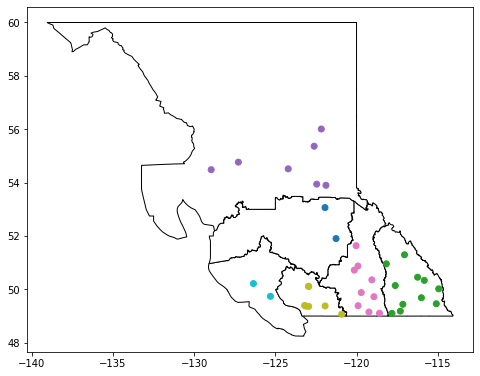

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize =(8,8))
region.plot(ax=ax, color='white', edgecolor='black')
ski_region.plot(ax=ax, column='TOURISM_REGION_NAME',figsize=(20,20))

plt.show()

In [36]:
region.to_file('../data/GSR_SKI_RESORTS_SV_region.geojson', driver="GeoJSON")

# Create mbtiles

In [19]:
layer_name = "tourism_regions"
source_path = "../data/ADM_TOURISM_REGIONS_SP_newname.geojson"
dest_path = "../data/tourism_regions.mbtiles"
create_mbtiles(source_path, dest_path, layer_name, opts="-zg --drop-densest-as-needed --extend-zooms-if-still-dropping --force --read-parallel")

Processing: tippecanoe -o ../data/tourism_regions.mbtiles -l tourism_regions -zg --drop-densest-as-needed --extend-zooms-if-still-dropping --force --read-parallel ../data/ADM_TOURISM_REGIONS_SP_newname.geojson
Task created
Finished processing


In [37]:
layer_name = "ski_resorts"
source_path = "../data/GSR_SKI_RESORTS_SV_region.geojson"
dest_path = "../data/ski_resorts.mbtiles"
create_mbtiles(source_path, dest_path, layer_name, opts="-zg --drop-densest-as-needed --extend-zooms-if-still-dropping --force --read-parallel")

Processing: tippecanoe -o ../data/ski_resorts.mbtiles -l ski_resorts -zg --drop-densest-as-needed --extend-zooms-if-still-dropping --force --read-parallel ../data/GSR_SKI_RESORTS_SV_region.geojson
Task created
Finished processing
